### Project Brief

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

#### Spark Funds has two minor constraints for investments:

- It wants to invest between 5 to 15 million USD per round of investment

- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in


In [1]:
# Note that all source file to be placed under the data folder in present directory.
import os
os.listdir("data/")

['Countries_where_English_is_an_official_language.pdf',
 'mapping.csv',
 'rounds2.csv',
 'companies.txt']

In [2]:
import PyPDF2

# reading the pdf file
pdf_object = open('data/Countries_where_English_is_an_official_language.pdf', 'rb')
pdf_reader = PyPDF2.PdfFileReader(pdf_object)

# Number of pages in the PDF file
print(pdf_reader.numPages)

# get a certain page's text
page_object = pdf_reader.getPage(0)

# Extract text from the page_object
print(page_object.extractText())

1
ListofcountrieswhereEnglishisanofficiallanguage
AfricaBotswanaCameroonEthiopiaEritrea
TheGambiaGhanaKenyaLesothoLiberiaMalawiMauritiusNamibiaNigeriaRwandaSeychellesSierraLeone
SouthAfricaSouthSudanSudanSwazilandTanzaniaUgandaZambiaZimbabwe
AmericasAntiguaandBarbudaTheBahamas
BarbadosBelizeCanadaDominicaGrenadaGuyanaJamaicaSaintKittsandNevisSaintLuciaSaintVincentandtheGrenadinesTrinidadandTobago
UnitedStates

AsiaIndiaPakistanPhilippinesSingaporeAustralia/OceaniaAustraliaFijiKiribatiMarshallIslandsFederatedStates
ofMicronesiaNauruNewZealand
PalauPapuaNewGuineaSamoaSolomonIslands
TongaTuvaluVanuatu
EuropeIrelandMaltaUnitedKingdom



#### The data is very much unstructured and will not be able to read them into a table. We will lookup later to see if this info needs to be converted to structred format.


In [3]:
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
# Lets load the companies and rounds into dataframes
companies = pd.read_csv("data/companies.txt", sep="\t", encoding = "ISO-8859-1")
rounds = pd.read_csv("data/rounds2.csv", encoding = "ISO-8859-1")

Lets explore the data

In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [6]:
companies.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Gini,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [7]:
rounds.describe()

,raised_amount_usd
count,"94,959.00"
mean,"10,426,869.33"
std,"114,821,247.98"
min,0.00
25%,"322,500.00"
50%,"1,680,511.00"
75%,"7,000,000.00"
max,"21,271,935,000.00"


In [8]:
companies.head(5)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [9]:
rounds.head(5)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00"
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00"
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00"
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00"


In [10]:
# Lets determine the unique company name
print(len(companies.name.unique()))

66103


In [11]:
print(len(companies.permalink.unique()))

66368


In [12]:
print(len(rounds.company_permalink.unique()))

90247


In [13]:
# It is observed that the company_permalink is case sensitive in the source data, normalize and get unique count
print(len(rounds['company_permalink'].str.lower().unique()))

66370


** Lets view rows with same company name. This is just to ensure that the number or unique company name is less than the number of unique permalink **



In [14]:
pd.concat(names for _, names in companies.groupby("name") if len(names) > 1)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
281,/Organization/3Divaz-2,3DIVAZ,http://www.3divaz.ch/Home,NaN,closed,NaN,NaN,NaN,NaN,01-07-2014
282,/Organization/3Divaz-3,3DIVAZ,http://www.3divaz.ch/Home,NaN,operating,CHE,1,CHE - Other,Wildegg,01-07-2014
3942,/Organization/Aps,APS,http://www.aps.com,Clean Technology,operating,NaN,NaN,NaN,NaN,NaN
3943,/Organization/Aps-Llc,APS,NaN,Real Estate,operating,USA,GA,Macon,Griffin,31-03-2011
3982,/Organization/Apx,APX,http://www.apxgroup.com,Clean Technology,operating,NLD,7,Amsterdam,Amsterdam,01-01-1999
3983,/Organization/Apx-2,APX,http://www.apx.com/,Energy Management|Environmental Innovation,operating,USA,CA,SF Bay Area,San Jose,NaN
1526,/Organization/Adtena,Adtena,http://adtena.com/,Ad Targeting|Advertising|Mobile Advertising,operating,NaN,NaN,NaN,NaN,NaN
1527,/Organization/Adtena-2,Adtena,http://adtena.com,NaN,closed,NaN,NaN,NaN,NaN,15-11-2014
1995,/Organization/Agora-3,Agora,http://www.agora.io/,Mobile|Mobile Software Tools|VoIP,operating,USA,CA,SF Bay Area,Palo Alto,01-01-2014
1996,/Organization/Agora-6,Agora,https://www.agora.co,Android|Apps|Internet|Mobile,operating,USA,NY,New York City,New York,01-07-2013


** This data shows that the same compnay exisits under different category and/or country, so we will not worry about it as we will be looking more closely using permalink and investment realted to company that each exist as seprate entity **

In [15]:
# Lets clean up the fileds on which we are going to merge the tables
companies['permalink'] = companies['permalink'].str.lower()
# now the unique count should be same without having to use lower
print(len(companies.permalink.unique()))

66368


In [16]:
rounds['permalink'] = rounds['company_permalink'].str.lower()
# now the unique count should be same without having to use lower
print(len(rounds.permalink.unique()))

66370


**(66370 - 66368) **
So there are 2 compaines information missing that have information in rounds2 table.

In [17]:
round_left_join = pd.merge(rounds, companies, how='left', on='permalink', indicator=True)
left_only = round_left_join[round_left_join['_merge'] != 'both']
left_only

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,_merge
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,nan,/organization/e-cãbica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,nan,/organization/energystone-games-çµç³æ¸¸æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,nan,/organization/huizuche-com-æ ç§ÿè½¦,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,"1,625,585.00",/organization/magnet-tech-ç£ç³ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,nan,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
109969,/ORGANIZATION/WEICHE-TECH-ÅÈ½¦Ç§Æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,nan,/organization/weiche-tech-åè½¦ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,nan,/organization/zengame-ç¦ æ¸¸ç§æ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [18]:
# number of entires on the rounds2 table with no matching entires in company table
len(left_only)

7

In [19]:
# Total number of rows on the rounds table
len(rounds)

114949

So there should be **(114949-7)** rows in our merged table.

## Merging rounds2 to companies table

In [20]:
master_frame = pd.merge(rounds, companies , how='inner', on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"10,000,000.00",/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,"700,000.00",/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [21]:
# total entire in the merged table
master_frame.shape

(114942, 16)

In [22]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114942 entries, 0 to 114941
Data columns (total 16 columns):
company_permalink          114942 non-null object
funding_round_permalink    114942 non-null object
funding_round_type         114942 non-null object
funding_round_code         31139 non-null object
funded_at                  114942 non-null object
raised_amount_usd          94958 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [23]:
# Let's evaulate what columns have missing data
master_frame.isnull().any()

company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [24]:
# summing up the missing values (column-wise)
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
dtype: int64

In [25]:
# Evaulate missing data in terms of percentage
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funding_round_code        72.91
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
founded_at                17.85
dtype: float64

In [26]:
# removing non-contributing and duplicate columns 
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('company_permalink', axis=1)

# Views missing data report post initial cleanup 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd         17.39
permalink                  0.00
name                       0.00
homepage_url               5.33
category_list              2.96
status                     0.00
country_code               7.54
state_code                 9.52
region                     8.84
city                       8.84
dtype: float64

It would be ideal to remove the rows for which the raised_amount_usd is Nan. Wihtout this info the row data is almost useless to our analysis.

In [27]:
import numpy as np

# removing NaN raised_amount_usd rows
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

# Missing data report post row deletion 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)


funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
homepage_url              4.56
category_list             1.10
status                    0.00
country_code              6.16
state_code                8.01
region                    7.42
city                      7.42
dtype: float64

At this point we have 6 columns with missing data. 
** I would be hesitent to remove any more row data as we have the raised_amount_usd info for all remaining rows. **
We could ignore the missing values of state_code, region and city as they do not bring any value for our final analysis


In [28]:
master_frame[master_frame.isnull().sum(axis=1) > 6].shape

(0, 13)

There are no rows missing all the 6 fields data. So we can safely say we have arrived at our gold master data

In [29]:
# count the number of rows having > 5 missing values
# using len(master_frame.index)
len(master_frame[master_frame.isnull().sum(axis=1) > 5].index)

191

In [30]:
# calculate the percentage
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

0.20114155732007835

In [31]:
# lets furture remove some of the columns which does not contribute to our current analysis
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)

# Missing data report post cleanup 
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             1.10
status                    0.00
country_code              6.16
dtype: float64

In [32]:
# fraction of rows lost
len(master_frame.index)/114942

0.8261384002366411

we have lost about 18% of the source data after data cleaning

In [33]:
master_frame['category_list'].describe()

count             93914
unique            23484
top       Biotechnology
freq               7773
Name: category_list, dtype: object

In [34]:
master_frame['raised_amount_usd'].describe()

count           94,958.00
mean        10,426,962.02
std        114,821,849.03
min                  0.00
25%            322,500.00
50%          1,680,521.00
75%          7,000,000.00
max     21,271,935,000.00
Name: raised_amount_usd, dtype: float64

In [35]:
# imputing NaNs by UNK - as unknow for now
master_frame.loc[pd.isnull(master_frame['country_code']), ['country_code']] = 'UNK'
# imputing NaNs by undefined - for now for category_list
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = "undefined"
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

funding_round_permalink   0.00
funding_round_type        0.00
funded_at                 0.00
raised_amount_usd         0.00
permalink                 0.00
name                      0.00
category_list             0.00
status                    0.00
country_code              0.00
dtype: float64

The funding types such as seed, venture, angel, etc. depend on the type of the company (startup, corporate, etc.), its stage (early stage startup, funded startup, etc.), the amount of funding (a few million USD to a billion USD), and so on. For example, seed, angel and venture are three common stages of startup funding.

Seed/angel funding refer to early stage startups whereas venture funding occurs after seed or angel stage/s and involves a relatively higher amount of investment.
Private equity type investments are associated with much larger companies and involve much higher investments than venture type. Startups which have grown in scale may also receive private equity funding. This means that if a company has reached the venture stage, it would have already passed through the angel or seed stage/s.
 

Spark Funds wants to choose one of these four investment types for each potential investment they will make.

 

Considering the constraints of Spark Funds, you have to decide one funding type which is most suitable for them.

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity).

Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [36]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
# averages

funding_round_type
post_ipo_debt           168,704,571.82
post_ipo_equity          82,182,493.87
secondary_market         79,649,630.10
private_equity           73,308,593.03
undisclosed              19,242,370.23
debt_financing           17,043,526.02
venture                  11,748,949.13
grant                     4,300,576.34
convertible_note          1,453,438.54
product_crowdfunding      1,363,131.07
angel                       958,694.47
seed                        719,779.62
equity_crowdfunding         538,368.21
non_equity_assistance       411,203.05
Name: raised_amount_usd, dtype: float64

In [37]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)
# medians

funding_round_type
secondary_market        32,600,000.00
private_equity          20,000,000.00
post_ipo_debt           19,950,000.00
post_ipo_equity         12,262,852.50
venture                  5,000,000.00
debt_financing           1,100,000.00
undisclosed              1,018,680.00
angel                      400,000.00
seed                       275,000.00
convertible_note           272,000.00
grant                      201,684.00
product_crowdfunding       183,915.00
equity_crowdfunding        100,000.00
non_equity_assistance       60,000.00
Name: raised_amount_usd, dtype: float64

In [38]:
import matplotlib.pyplot as plt

# the commonly used alias for seaborn is sns
import seaborn as sns

# set a seaborn style of your taste
sns.set_style("whitegrid")

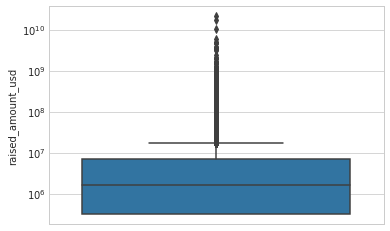

In [39]:
sns.boxplot(y=master_frame['raised_amount_usd'])
plt.yscale('log')
plt.show()

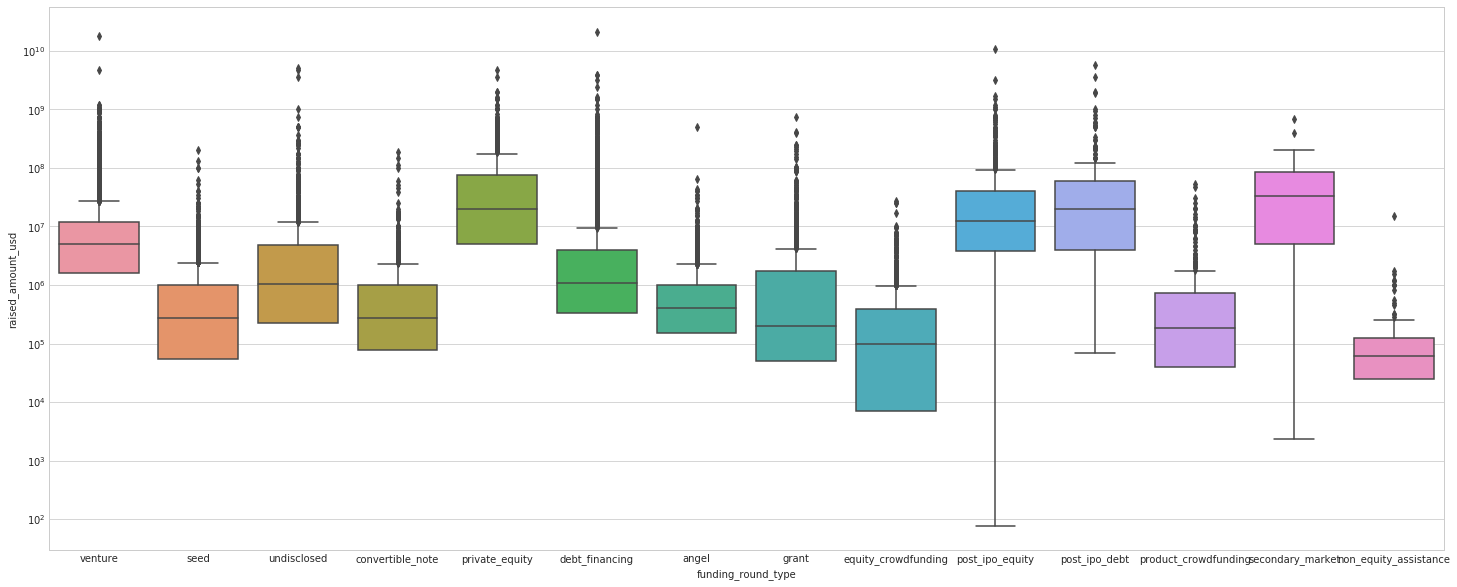

In [40]:
# boxplot of a variable across various funding categories
plt.figure(figsize=(25, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

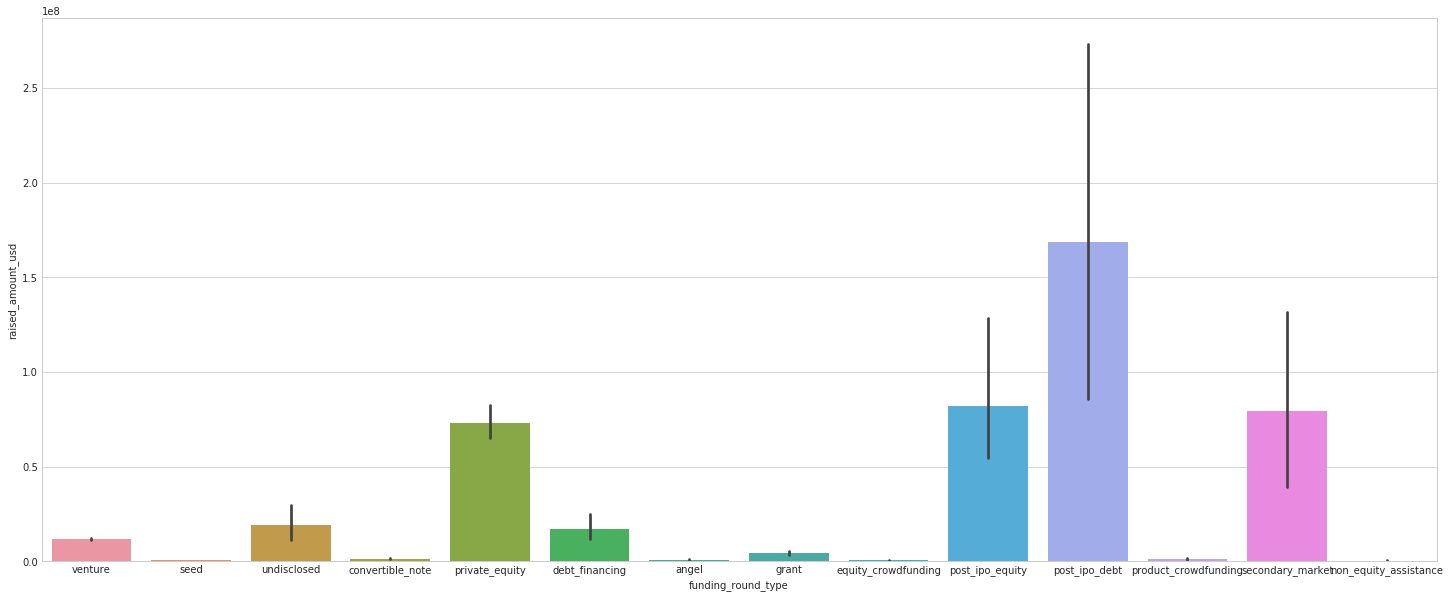

In [41]:
# bar plot with default statistic=mean
plt.figure(figsize=(25, 10))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.show()

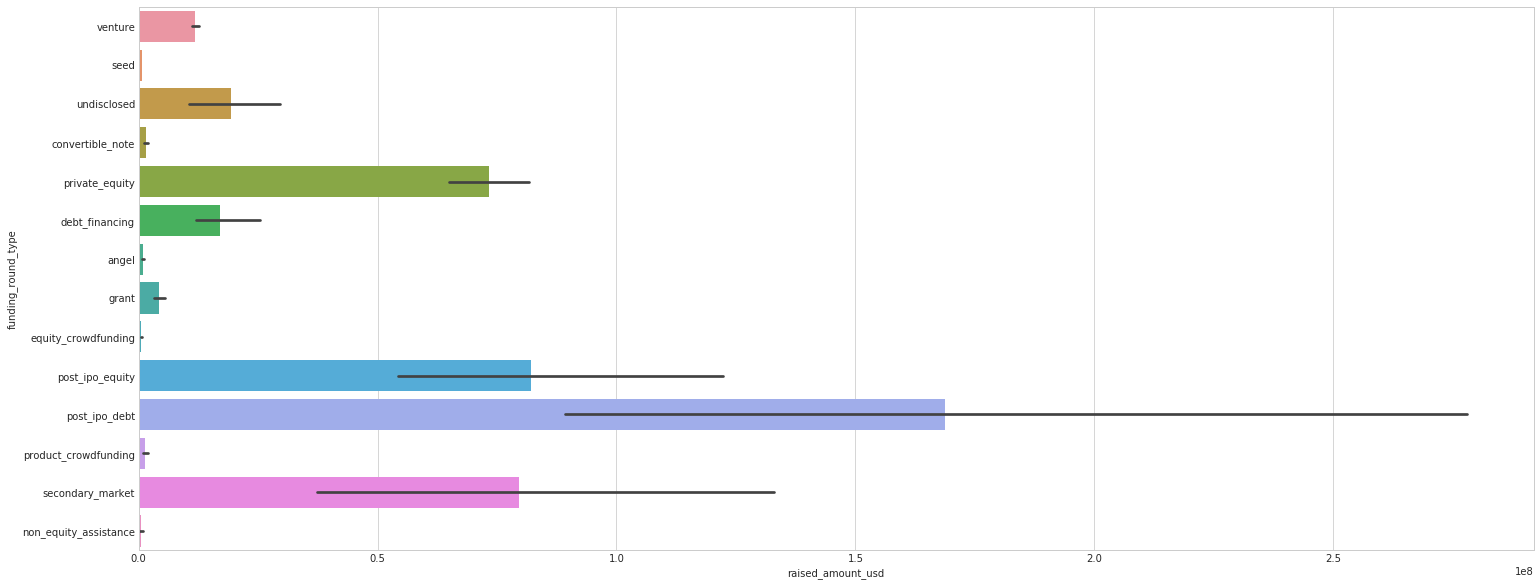

In [42]:
# bar plot with default statistic=mean
plt.figure(figsize=(25, 10))
sns.barplot(y='funding_round_type', x='raised_amount_usd', data=master_frame)
plt.show()

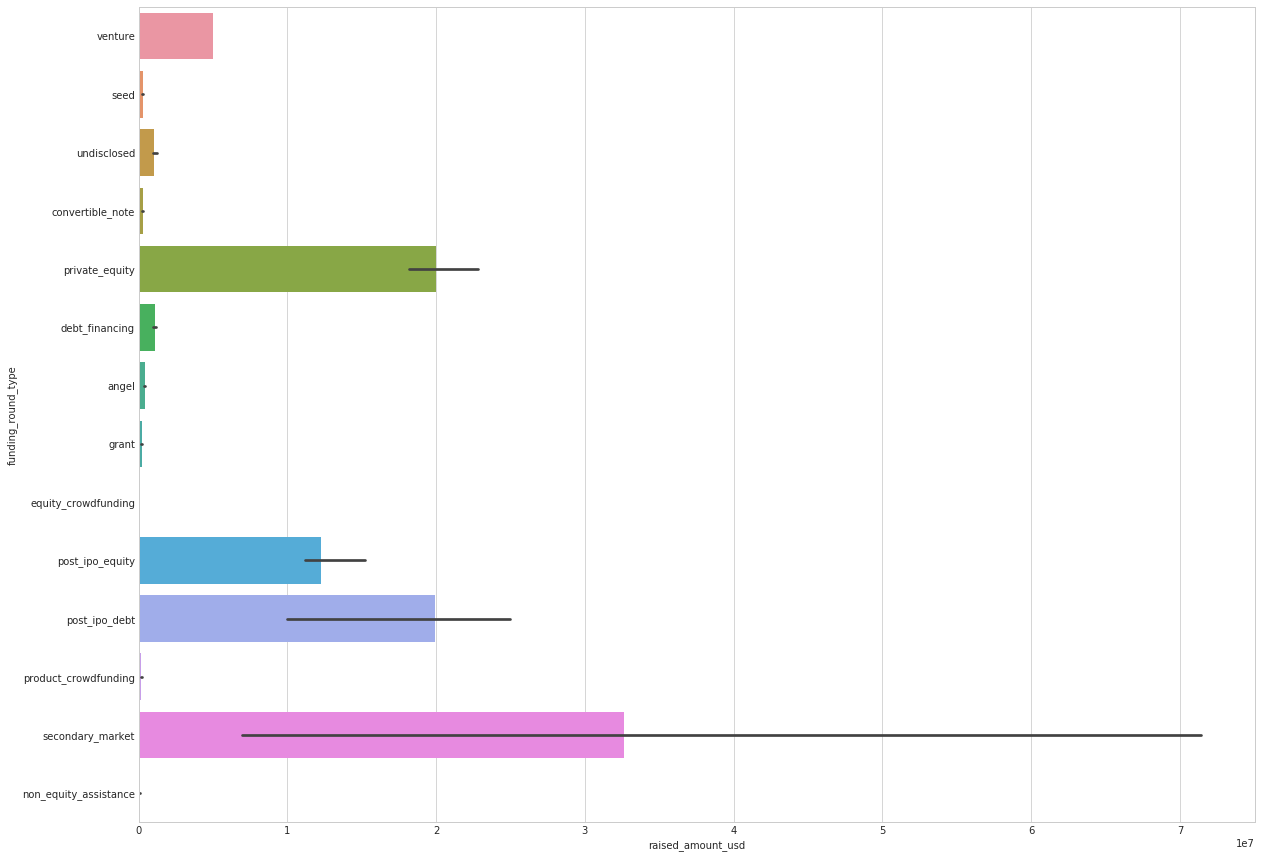

In [43]:
# Plotting categorical variable across the y-axis
plt.figure(figsize=(20, 15))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

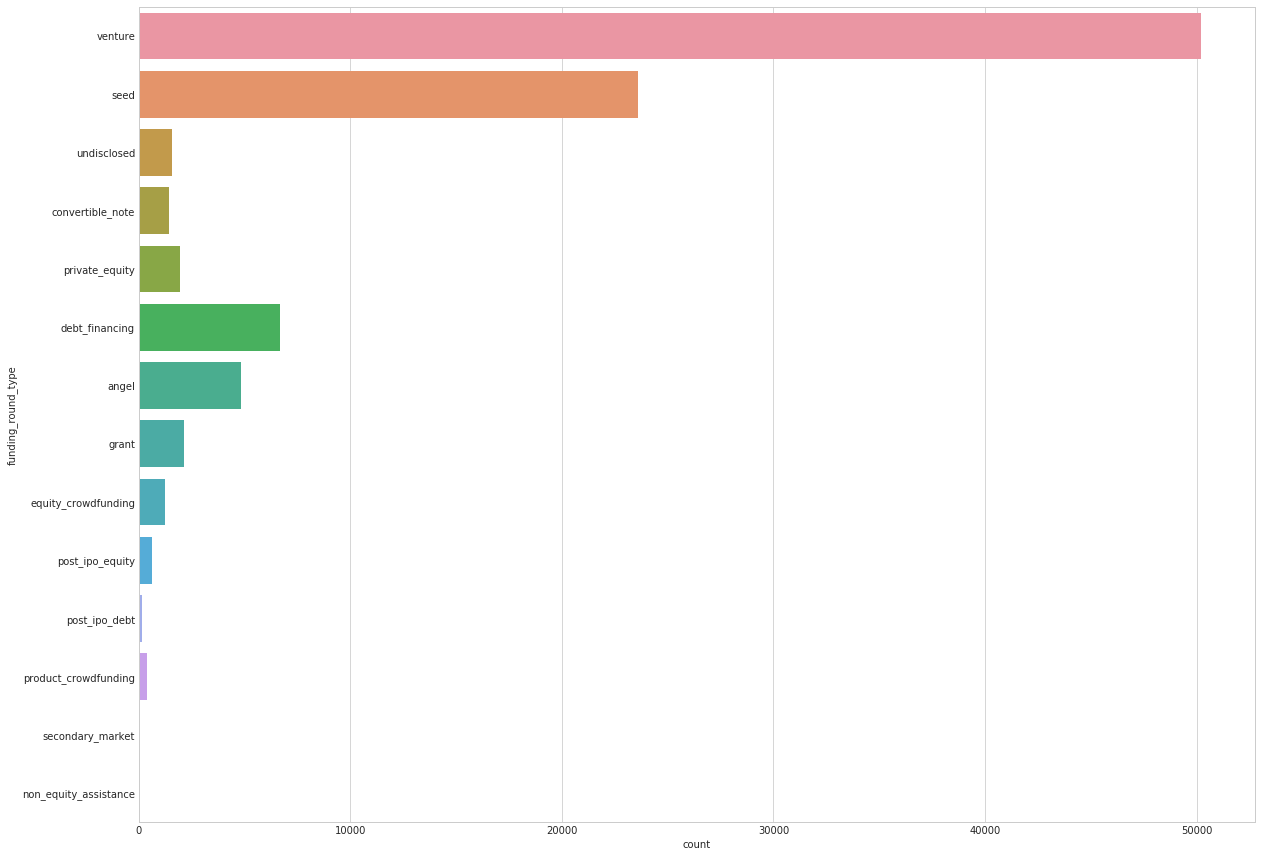

In [44]:
# Plotting count across a categorical variable 
plt.figure(figsize=(20, 15))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

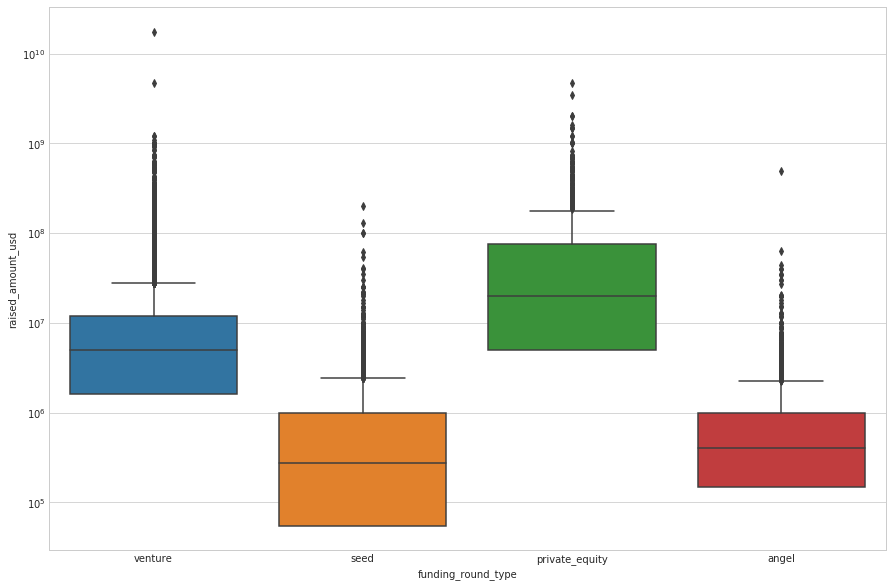

In [45]:
#Lets now restrict our master frame to only contain the 4 type of funding rounds

master_frame = master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

# boxplot of a variable across various funding categories
plt.figure(figsize=(15, 10))
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.yscale('log')
plt.show()

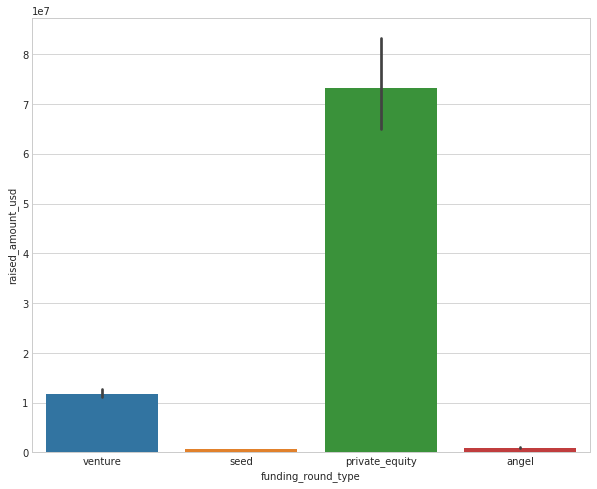

In [46]:
# bar plot with default statistic=mean
plt.figure(figsize=(10, 8))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.show()

In [47]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)
#averages.

funding_round_type
private_equity   73,308,593.03
venture          11,748,949.13
angel               958,694.47
seed                719,779.62
Name: raised_amount_usd, dtype: float64

In [48]:
master_frame.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)
#averages.

funding_round_type
private_equity   20,000,000.00
venture           5,000,000.00
angel               400,000.00
seed                275,000.00
Name: raised_amount_usd, dtype: float64

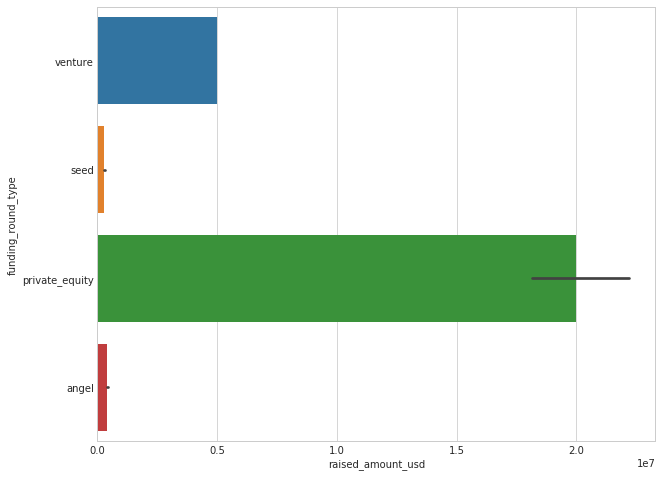

In [49]:
# Plotting categorical variable across the y-axis
plt.figure(figsize=(10, 8))
sns.barplot(x='raised_amount_usd', y="funding_round_type", data=master_frame, estimator=np.median)
plt.show()

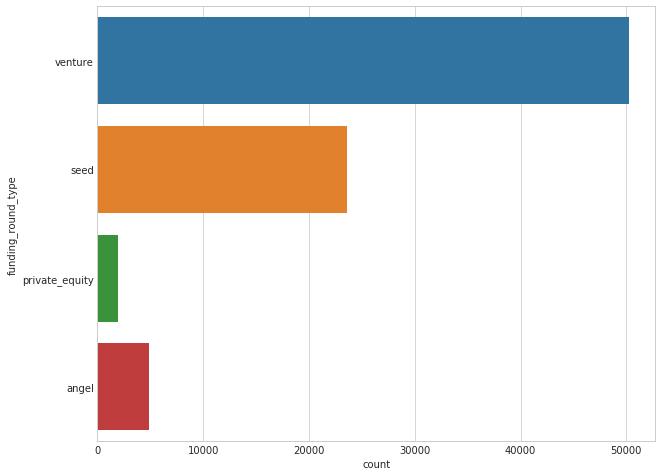

In [50]:
# Plotting count across a categorical variable 
plt.figure(figsize=(10, 8))
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

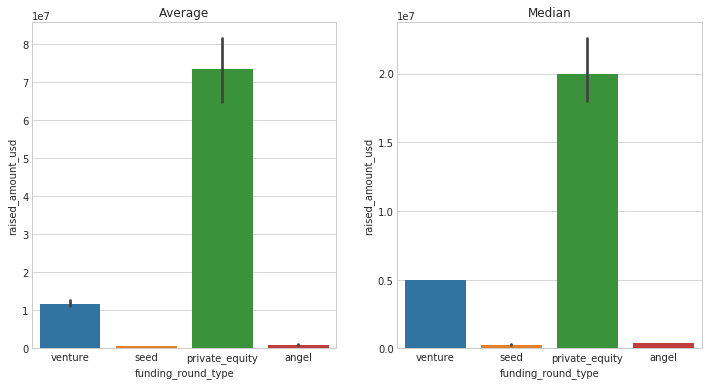

In [51]:
# Create 2 subplots for mean and median respectively

# increase figure size 
plt.figure(figsize=(12, 6))

# subplot 1: statistic=mean
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
plt.title("Average")

# subplot 2: statistic=median
plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame, estimator=np.median)
plt.title("Median")

plt.show()

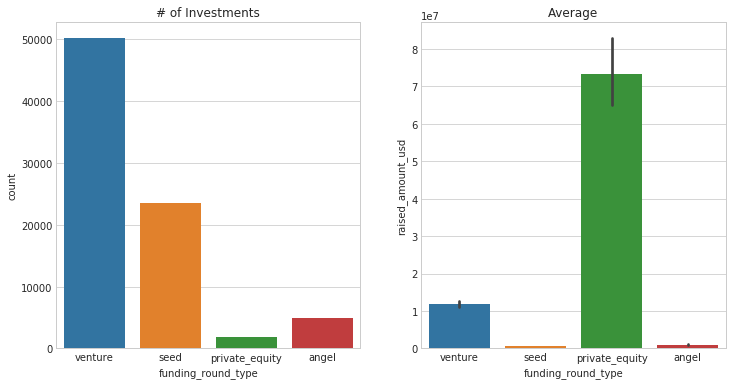

In [52]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x="funding_round_type", data=master_frame)
plt.title("# of Investments")
plt.subplot(1, 2, 2)
sns.barplot(y='raised_amount_usd', x="funding_round_type", data=master_frame, estimator=np.mean)
plt.title("Average")
plt.show()

### From above chart it seems that many are investing in venture and they fall in the bracket of 5 to 15 million which spark fund have budgeted for. 

In [53]:
# Let's purge our data to only include venture type
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture'])]
master_frame.describe()

,raised_amount_usd
count,"50,228.00"
mean,"11,748,949.13"
std,"86,352,066.56"
min,0.00
25%,"1,600,901.75"
50%,"5,000,000.00"
75%,"12,000,000.00"
max,"17,600,000,000.00"


In [54]:
master_frame.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND
3,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,"3,406,878.00",/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,UNK
4,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,"2,000,000.00",/organization/0-6-com,0-6.com,Curated Web,operating,CHN
8,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,"719,491.00",/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA


In [55]:
master_frame['country_code'].describe()

count     50228
unique       98
top         USA
freq      36139
Name: country_code, dtype: object

### Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. This is a part of its broader strategy to invest where most investments are occurring.

In [56]:
master_frame.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(15)

country_code
USA   422,510,842,796.00
CHN    39,835,418,773.00
UNK    25,506,108,414.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
CAN     9,583,332,317.00
FRA     7,259,536,732.00
ISR     6,907,514,579.00
DEU     6,346,959,822.00
JPN     3,363,676,611.00
SWE     3,254,952,563.00
NLD     2,939,403,619.00
CHE     2,827,560,264.00
SGP     2,793,917,856.00
ESP     1,835,831,452.00
Name: raised_amount_usd, dtype: float64

#### Before we proceed we need to clean the categories_list column data . First string before the vertical bar will be considered the primary sector.

In [57]:
# function to strip additional values and retian only the first value
def retain_first(value):
    values = value.split('|')
    if len(values) > 1:
        return values[0]
    else:
        return value

In [58]:
# lets test the function 
print(retain_first('Apps|Games|Mobile'))

Apps


In [59]:
print(retain_first('Games'))

Games


In [60]:
master_frame['primary_sector'] = master_frame['category_list'].apply(retain_first)
master_frame['primary_sector'] = master_frame['primary_sector'].str.lower()

In [61]:
# Create a new data frame top9 with the list of countries with highest funding
top9 = master_frame[master_frame['country_code'].isin(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN' ])]

top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.00
CHN    39,835,418,773.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
CAN     9,583,332,317.00
FRA     7,259,536,732.00
ISR     6,907,514,579.00
DEU     6,346,959,822.00
JPN     3,363,676,611.00
Name: raised_amount_usd, dtype: float64

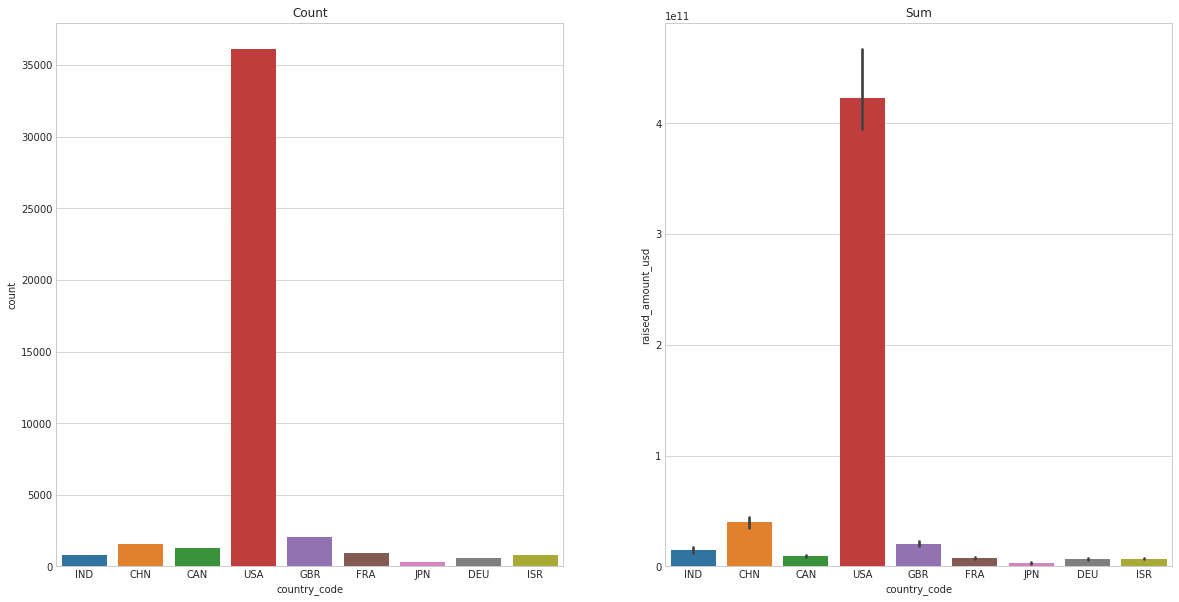

In [62]:
# Plotting sum across top 9 country_code 

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top9)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top9, estimator=sum)
plt.title("Sum")
plt.show()

### Identify the top three English-speaking countries in the data frame top9. The countires has been short listed by manual analysis of the list provided for english as offical lanaguage list (pdf)

## USA
## GBR
## IND

In [63]:
# Let's now create a new data frame with only these 3 countires data for furthur sector wise analysis
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)

country_code
USA   422,510,842,796.00
GBR    20,245,627,416.00
IND    14,391,858,718.00
Name: raised_amount_usd, dtype: float64

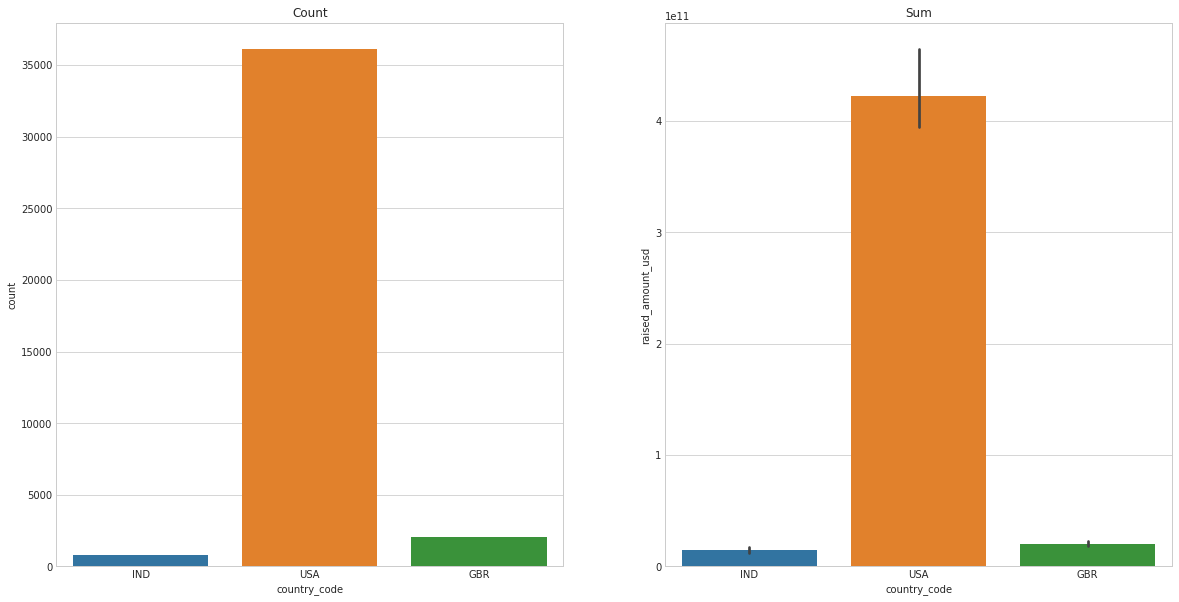

In [64]:
# Plotting sum across top 3 english official language country_code 
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(x="country_code", data=top3_english)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd", data=top3_english, estimator=sum)
plt.title("Sum")
plt.show()

In [65]:
#Let's load the mapping csv file into a dataframe and start with sector wise analysis
mapping = pd.read_csv("data/mapping.csv", encoding = "ISO-8859-1")
mapping.head(5)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


### Totally there are 7 main categories excluding Others and Blank data

In [66]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.8+ KB


In [67]:
mapping = pd.melt(mapping,id_vars=["category_list"])
mapping = mapping[mapping.value != 0]
mapping.head(10)

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1
57,Bicycles,Automotive & Sports,1
69,Boating Industry,Automotive & Sports,1
87,CAD,Automotive & Sports,1
93,Cars,Automotive & Sports,1
188,Design,Automotive & Sports,1


In [68]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 688 entries, 8 to 6167
Data columns (total 3 columns):
category_list    687 non-null object
variable         688 non-null object
value            688 non-null int64
dtypes: int64(1), object(2)
memory usage: 21.5+ KB


In [69]:
mapping = mapping.drop('value', axis=1)
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping['primary_sector'] = mapping['primary_sector'].str.lower()

In [70]:
len(top3_english)

39018

In [71]:
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)
top3_english.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment,both
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging",both


In [72]:
# Assert we have not added or removed any rows
len(top3_english)

39018

In [73]:
left_only = top3_english[top3_english['_merge'] != 'both']
left_only.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector,_merge
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,NaN,left_only
12,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,"500,000.00",/organization/100plus,100Plus,Analytics,acquired,USA,analytics,NaN,left_only
43,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,"2,500,000.00",/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,analytics,NaN,left_only


In [74]:
# Lets determine the unique primary sector name
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'alternative medicine', 'analytics',
       'big data analytics', 'biotechnology and semiconductor',
       'business analytics', 'cannabis', 'career management',
       'cloud management', 'contact management',
       'digital rights management', 'digital signage',
       'document management', 'educational games', 'energy management',
       'event management', 'finance', 'finance technology',
       'financial exchanges', 'financial services', 'fleet management',
       'governance', 'greentech', 'identity management',
       'innovation management', 'intellectual asset management',
       'investment management', 'it management', 'journalism',
       'knowledge management', 'lead management', 'mobile analytics',
       'nanotechnology', 'natural gas uses', 'natural language processing',
       'navigation', 'personal finance', 'personalization',
       'product search', 'professional networking',
       'professional services', 'project management',
   

In [75]:
mapping.primary_sector.sort_values(ascending=True)

1847                 0notechnology
1848    0tural language processing
1849              0tural resources
4602                     0vigation
3441                            3d
3442                   3d printing
3443                 3d technology
5526                      a0lytics
5508                    accounting
2757              active lifestyle
5510                  ad targeting
3447            advanced materials
8                 adventure travel
5513                   advertising
5514         advertising exchanges
5515          advertising networks
5516         advertising platforms
4829                        advice
14                       aerospace
3455                   agriculture
1392         air pollution control
4833                    algorithms
4834                   all markets
4835                  all students
2772           alter0tive medicine
4837                        alumni
5527                       android
4840                        angels
2777                

### From visual examination we can see that na is misspelt as 0. Eg: ma0gement, 0no, 0tural

In [76]:
# function to replace 0 with na
import re
mapping['primary_sector'] = mapping.primary_sector.apply(lambda x: re.sub('[0]', 'na', str(x)))

In [77]:
top3_english = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
top3_english = pd.merge(top3_english, mapping, how='left', on='primary_sector', indicator=True)
left_only = top3_english[top3_english['_merge'] != 'both']
left_only.primary_sector.sort_values(ascending=True).unique()

array(['adaptive equipment', 'biotechnology and semiconductor',
       'enterprise 2.0', 'greentech', 'natural gas uses', 'product search',
       'racing', 'rapidly expanding', 'retirement', 'specialty retail',
       'undefined'], dtype=object)

In [78]:
mapping.primary_sector.sort_values(ascending=True)

3441                                    3d
3442                           3d printing
3443                         3d technology
5508                            accounting
2757                      active lifestyle
5510                          ad targeting
3447                    advanced materials
8                         adventure travel
5513                           advertising
5514                 advertising exchanges
5515                  advertising networks
5516                 advertising platforms
4829                                advice
14                               aerospace
3455                           agriculture
1392                 air pollution control
4833                            algorithms
4834                           all markets
4835                          all students
2772                  alternative medicine
4837                                alumni
5526                             analytics
5527                               android
4840       

In [79]:
len(left_only)

230

In [80]:
# we will ignore these as we not able to map then 
# since we did a left join, we can remove all rows that does not have 'both' indicator.
top3_english = top3_english[top3_english['_merge'] == 'both']
top3_english = top3_english.drop('_merge', axis=1)
top3_english.head()

,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,primary_sector,main_sector
0,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,"10,000,000.00",/organization/-fame,#fame,Media,operating,IND,media,Entertainment
1,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,"20,000,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
2,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,"1,700,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
3,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,"8,900,000.00",/organization/0xdata,H2O.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
4,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,"5,000,000.00",/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps,"News, Search and Messaging"


## Merged dataframe has two additioanl columns - primary_sector and main_sector 

In [81]:
top3_english.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 39017
Data columns (total 11 columns):
funding_round_permalink    38788 non-null object
funding_round_type         38788 non-null object
funded_at                  38788 non-null object
raised_amount_usd          38788 non-null float64
permalink                  38788 non-null object
name                       38788 non-null object
category_list              38788 non-null object
status                     38788 non-null object
country_code               38788 non-null object
primary_sector             38788 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


In [82]:
# lets drop all rows whoes investment is not between 5 and 15 million
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd < 5000000)].index)
top3_english = top3_english.drop(top3_english[(top3_english.raised_amount_usd > 15000000)].index)

d1 = top3_english[top3_english['country_code'] == 'USA']
d2 = top3_english[top3_english['country_code'] == 'GBR']
d3 = top3_english[top3_english['country_code'] == 'IND']

In [83]:
len(d1)

12063

In [84]:
len(d2)

621

In [85]:
len(d3)

328

In [86]:
d1['raised_amount_usd'].count()

12063

In [87]:
d1['raised_amount_usd'].sum()

107757097294.0

In [88]:
d1['raised_amount_usd'].median()

8300000.0

In [89]:
d1['raised_amount_usd'].mean()

8932860.589737212

In [90]:
# USA
d1.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,167,"1,454,104,361.00"
Cleantech / Semiconductors,2350,"21,633,430,822.00"
Entertainment,591,"5,099,197,982.00"
Health,909,"8,211,859,357.00"
Manufacturing,799,"7,258,553,378.00"
"News, Search and Messaging",1583,"13,971,567,428.00"
Others,2950,"26,321,007,002.00"
"Social, Finance, Analytics, Advertising",2714,"23,807,376,964.00"


In [91]:
d1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Manufacturing                               799
Entertainment                               591
Automotive & Sports                         167
Name: raised_amount_usd, dtype: int64

In [92]:
d1[d1['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/virtustream           64,300,000.00
/organization/capella               54,968,051.00
/organization/airtight-networks     54,201,907.00
/organization/decarta               52,100,000.00
/organization/black-duck-software   51,000,000.00
Name: raised_amount_usd, dtype: float64

In [93]:
d1[d1['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/shotspotter   67,933,006.00
/organization/demandbase    63,000,000.00
/organization/intacct       61,800,000.00
/organization/netbase       60,600,000.00
/organization/lotame        59,700,000.00
Name: raised_amount_usd, dtype: float64

In [94]:
d2['raised_amount_usd'].count()

621

In [95]:
d2['raised_amount_usd'].sum()

5379078691.0

In [96]:
d2['raised_amount_usd'].mean()

8661962.465378422

In [97]:
d2['raised_amount_usd'].median()

8000000.0

In [98]:
# GBR
d2.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,16,"167,051,565.00"
Cleantech / Semiconductors,130,"1,163,990,056.00"
Entertainment,56,"482,784,687.00"
Health,24,"214,537,510.00"
Manufacturing,42,"361,940,335.00"
"News, Search and Messaging",73,"615,746,235.00"
Others,147,"1,283,624,289.00"
"Social, Finance, Analytics, Advertising",133,"1,089,404,014.00"


In [99]:
d2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Manufacturing                               42
Health                                      24
Automotive & Sports                         16
Name: raised_amount_usd, dtype: int64

In [100]:
d2[d2['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(3)

permalink
/organization/electric-cloud   37,000,000.00
/organization/sensage          36,250,000.00
/organization/enigmatic        32,500,000.00
Name: raised_amount_usd, dtype: float64

In [101]:
d2[d2['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(5)

permalink
/organization/celltick-technologies   37,500,000.00
/organization/mythings                34,000,000.00
/organization/zopa                    32,900,000.00
/organization/imagini                 28,550,000.00
/organization/marketinvoice           25,553,007.00
Name: raised_amount_usd, dtype: float64

In [102]:
d3['raised_amount_usd'].count()

328

In [103]:
d3['raised_amount_usd'].sum()

2949543602.0

In [104]:
d3['raised_amount_usd'].mean()

8992510.981707318

In [105]:
d3['raised_amount_usd'].median()

8700000.0

In [106]:
# IND
d3.pivot_table(values = 'raised_amount_usd',index = ['main_sector'], aggfunc = {'sum','count'})

,count,sum
main_sector,,
Automotive & Sports,13,"136,900,000.00"
Cleantech / Semiconductors,20,"165,380,000.00"
Entertainment,33,"280,830,000.00"
Health,19,"167,740,000.00"
Manufacturing,21,"200,900,000.00"
"News, Search and Messaging",52,"433,834,545.00"
Others,110,"1,013,409,507.00"
"Social, Finance, Analytics, Advertising",60,"550,549,550.00"


In [107]:
d3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [108]:
d3[d3['main_sector'] == "Others" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/firstcry-com                                                             39,000,000.00
/organization/myntra                                                                   38,000,000.00
/organization/commonfloor                                                              32,900,000.00
/organization/pepperfry-com                                                            28,000,000.00
/organization/itzcash-card-ltd                                                         25,000,000.00
/organization/nxtgen-data-center-cloud-services                                        22,300,000.00
/organization/maharana-infrastructure-and-professional-services-private-limited-mips   21,600,000.00
/organization/caratlane                                                                21,000,000.00
/organization/comat-technologies                                                       21,000,000.00
/organization/limeroad                                                           

In [109]:
d3[d3['main_sector'] == "Social, Finance, Analytics, Advertising" ].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).head(10)

permalink
/organization/manthan-systems                                50,700,000.00
/organization/komli-media                                    28,000,000.00
/organization/shopclues-com                                  25,000,000.00
/organization/intarvo                                        21,900,000.00
/organization/grameen-financial-services                     21,556,050.00
/organization/bankbazaar                                     19,000,000.00
/organization/microland                                      18,300,000.00
/organization/eka-software-solutions                         16,000,000.00
/organization/qyuki                                          15,400,000.00
/organization/financial-information-network-operations-pvt   15,000,000.00
Name: raised_amount_usd, dtype: float64

# USA

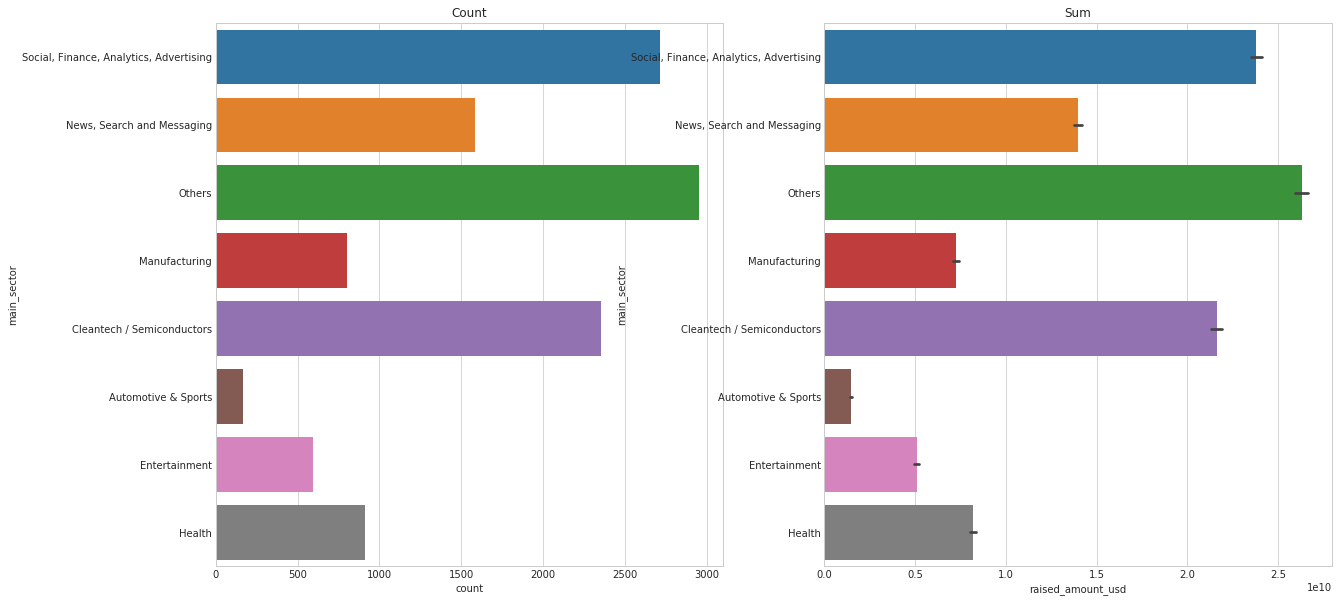

In [110]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=d1)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=d1, estimator=sum)
plt.title("Sum")
plt.show()

# Great Britian

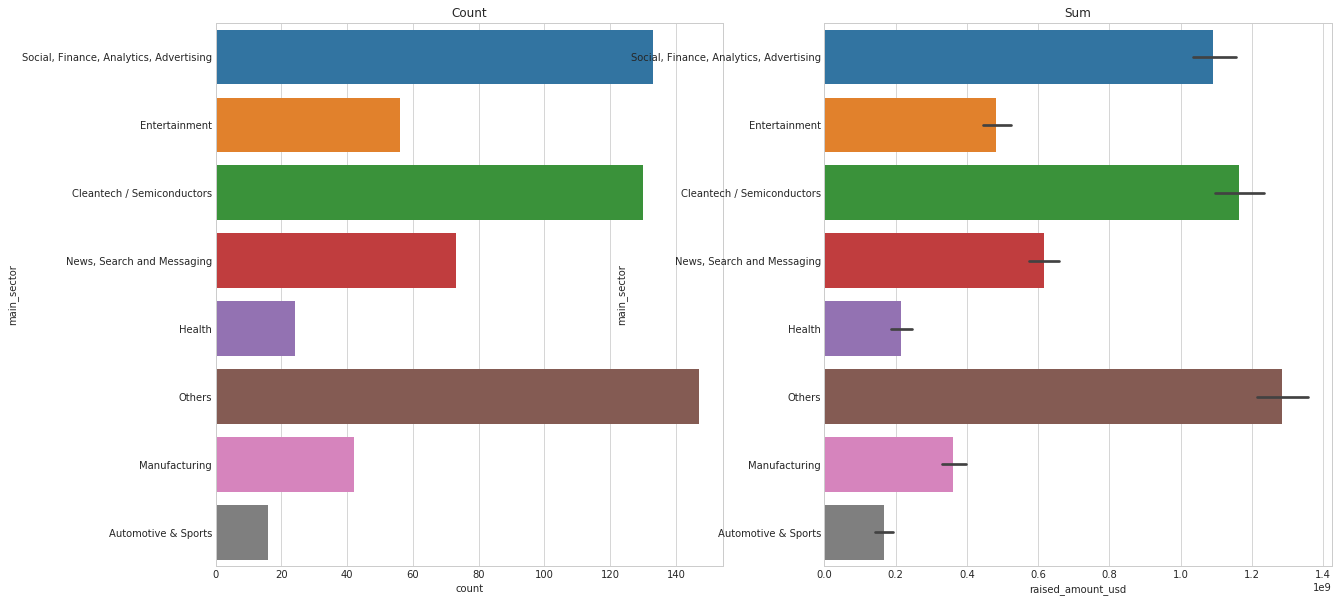

In [111]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=d2)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=d2, estimator=sum)
plt.title("Sum")
plt.show()

# India

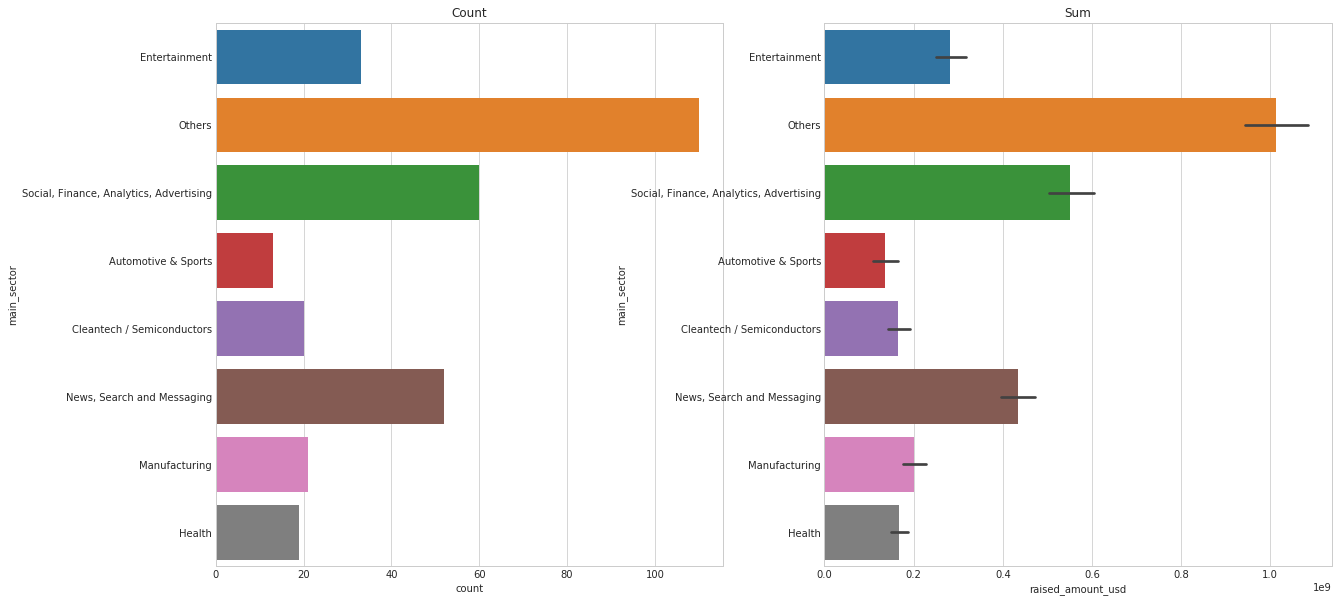

In [112]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.countplot(y="main_sector", data=d3)
plt.title("Count")
plt.subplot(1, 2, 2)
sns.barplot(y="main_sector", x="raised_amount_usd", data=d3, estimator=sum)
plt.title("Sum")
plt.show()

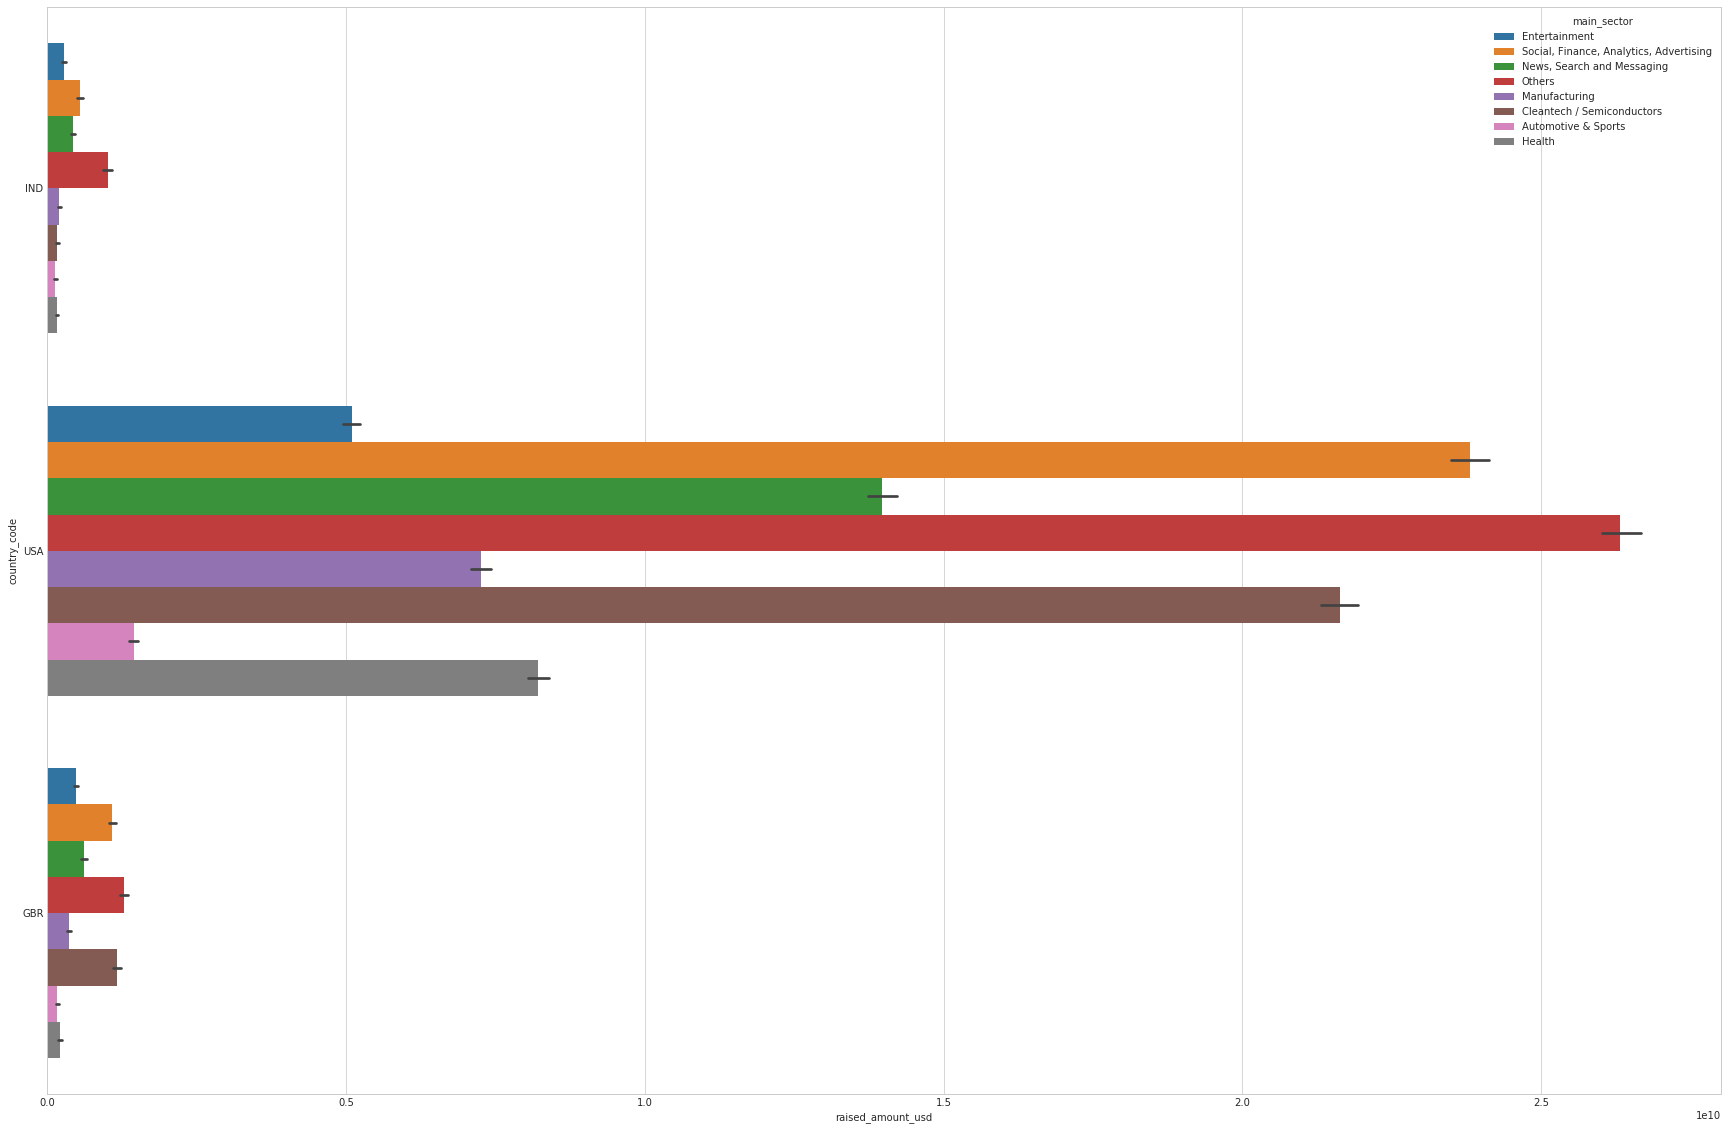

In [113]:
# specify hue="categorical_variable"
plt.figure(figsize=(30, 20))
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=top3_english, estimator=np.sum)
plt.show()

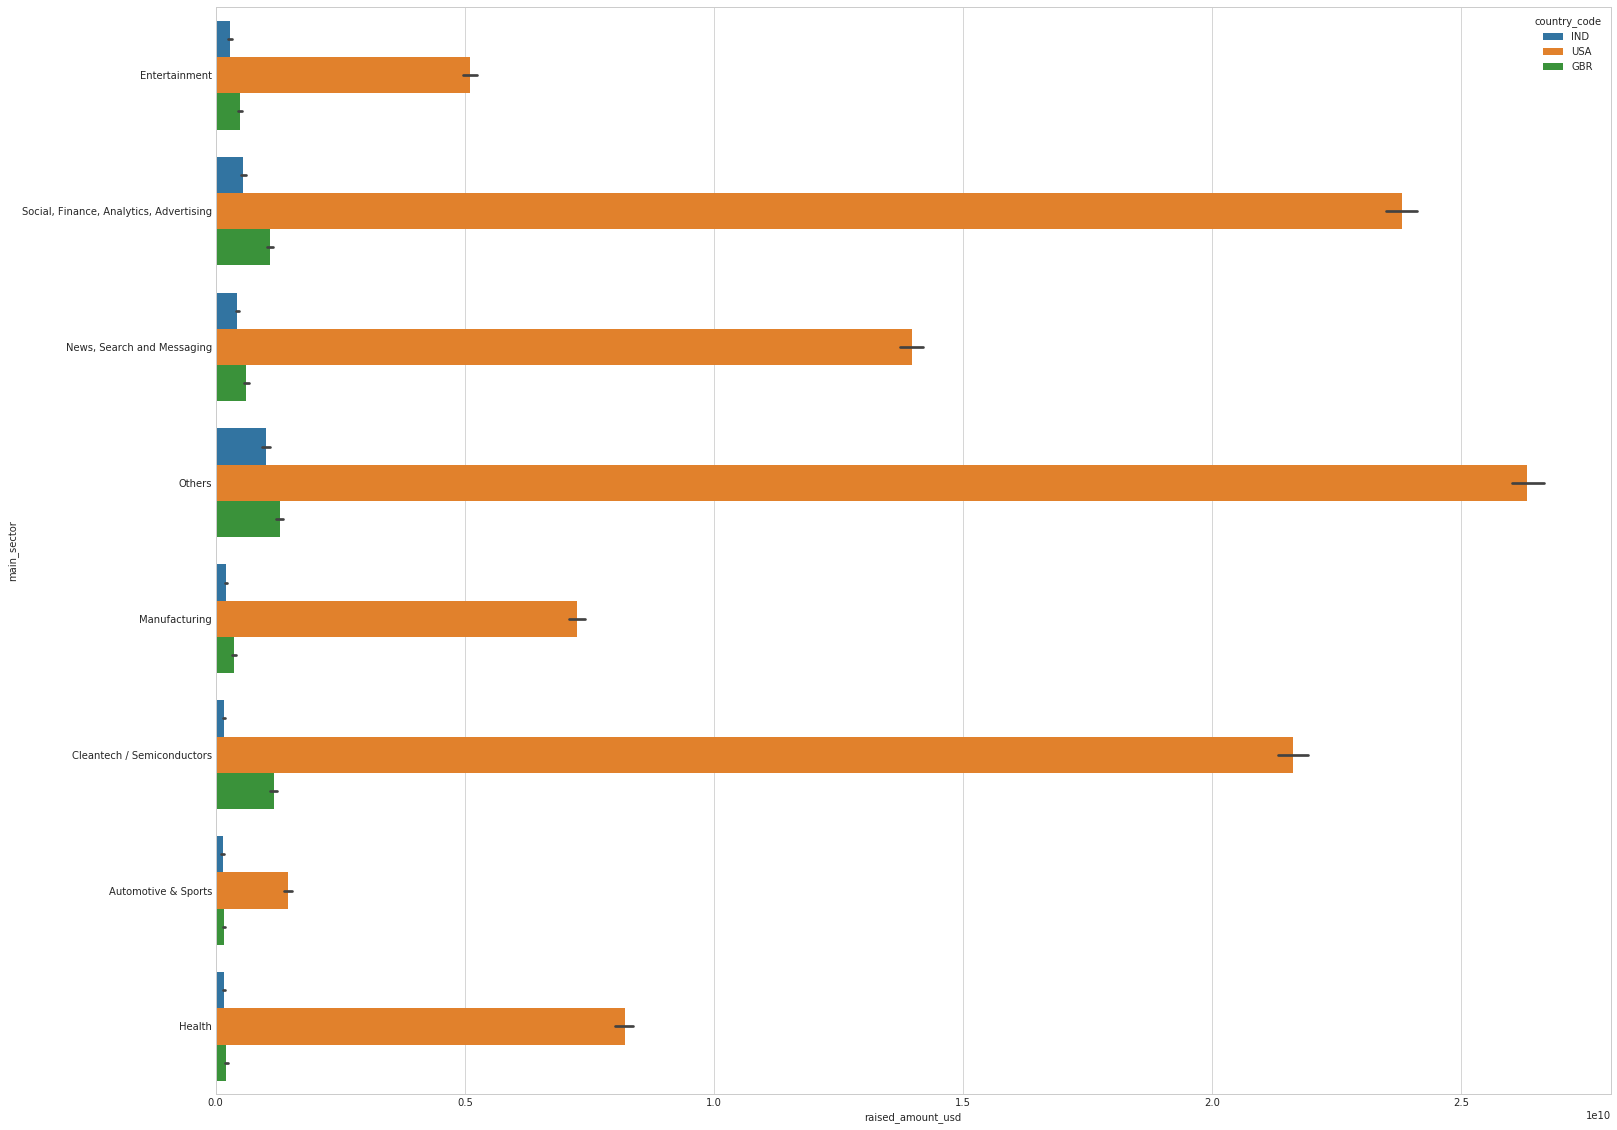

In [114]:
plt.figure(figsize=(25, 20))
sns.barplot(y='main_sector', x='raised_amount_usd', hue="country_code", data=top3_english, estimator=np.sum)
plt.show()